<a href="https://colab.research.google.com/github/luisrevilla20/Reconocimiento_Patrones_RedesNeuronales/blob/main/Exam_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questions
---

1. What is the difference between artificial intelligence, machine learning and deep learning? (6 points)

R: Artificial intelligence son sistemas que imitan la inteligencia humana para realizar tareas en específico.
   Machine learning es un conjunto de AI que ayudan a una computadora a como resolver un problema en específico.
   Deep Learning es un tipo de aprendizaje que ayuda a clasificar y/o predecir.

2. What is supervised learning? (6 points)

R: El aprendizaje supervisado es una técnica para poder deducir la función que resuelve el problema a través de saber el input y el resultado final va entrenando un modelo para así poder descubrir la solución.

3. What does the loss function represent? (6 points)

R: La función de perdida es el error que tiene el modelo en comparación a la respuesta real. Ayuda a ir ajustando el modelo.

4. Describe, in your own words, what are the weights of a neural network, and what kind of data do they store. (6 points)

R: Los pesos son los valores que nos ayudan a ver que nodo tendrá la mayor importancia.

5. What does the 'deep' in deep learning mean? (6 points)

R: La profundidad se refiere al número de capas que el modelo tiene.

# Simple Neural Network

Complete the notebook so that you can run the following model on the XOR data set.

![Neural network](https://drive.google.com/uc?id=1jXT22Gd4hMQDJTrNLDRYSMCdCxH1dQ2t)

## Import the necessary packages

In [1]:
import numpy as np
import random, math
import matplotlib.pyplot as plt

## Define auxiliary functions

### Define the sigmoid and sigmoid derivative functions (10 points)

In [2]:
# TODO: Define the sigmoid function, as well as the derivative of the function

def sigmoid(x):
  ''' Calculates the sigmoid function on a set of data

    Args:
      x (np array): the array on which you apply the sigmoid function
    
  '''
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  ''' Calculates the derivative of the sigmoid function

    Args:
      x (np array): the array on which you apply the derivative sigmoid function
    
  '''
  return sigmoid(x) * (1 - sigmoid(x))

### Define the loss function (5 points)

In [3]:
# TODO: Define the loss function

def loss(y_hat, y):
  ''' Calculates the error of a prediction based on an input

  Args:
    y_hat (np array): the predictions of the model
    y (np array): the labels of the data inputs

  Returns:
    np array: an array with the errors for each prediction
  '''
  return -(y * np.log(y_hat) + (1-y) * np.log(1-y_hat))

### Define the predict function (15 points)

In [4]:
# TODO: Define the predict function

def predict(weights, b, input):
  ''' Makes a prediction on an input

  Args:
    weights (np array): The array of weights of a given layer of the model
    b (np array):  The array of biases for a given layer of the model
    input (np array): The input on which to predict

  Returns:
    tuple of np arrays: Tuple containing the value of z = W Input + b, and a = sigmoid(z)
  '''
  return np.dot(weights, input) + b , sigmoid(np.dot(weights, input) + b )

## Training with the XOR dataset

### Input data set

In [5]:
XOR = np.array([[0,0], [0,1], [1,0], [1,1]]).T
print(f"XOR data: \n{XOR}\nShape: {XOR.shape}")

XOR_labels = np.array([[0, 1, 1, 0]])
print(f"XOR labels: \n{XOR_labels}\nShape: {XOR_labels.shape})")

number_inputs = 4

XOR data: 
[[0 0 1 1]
 [0 1 0 1]]
Shape: (2, 4)
XOR labels: 
[[0 1 1 0]]
Shape: (1, 4))


### Run the training step (30 points)

In [6]:
np.random.seed(42)

# TODO: initialize the needed matrices of weights with random values. Check np.random.randn
weights_1 = np.random.randn(2, 3)
weights_2 = np.random.randn(3, 1)

# TODO: initialize the needed biases with random values. Check np.random.randn
b_1 = np.random.randn(3, 1)
b_2 = np.random.randn(1, )

# TODO: initialize the learning rate
alpha = 0.1

errors = []

for epoch in range(5000):

  # Forward propagation - prediction

  # TODO: Make a prediction using the previous method
  input = XOR
  m, n = input.shape

  # z = W Input + b
  # a = sigmoid(z) dyh_hat
  z, a = predict(weights_1.T, b_1, input) #Hidden layer
  z2, a2 = predict(weights_2.T, b_2, a) #Output layer

  
  # TODO: Calculate the error at the output layer
  J = np.mean(loss(a2, XOR_labels))

  errors.append(J)

  # TODO: Calculate the derivatives for the output layer
  dyo = a2 - XOR_labels
  dw2 = np.dot(dyo, a.T) * 1/n
  db2 = np.sum(dyo) * 1/n
  
  # TODO: Calculate the derivative at the hidden layer
  
  dyh = np.dot(weights_2, dyo) * sigmoid_derivative(np.dot(weights_1.T, XOR) + b_1)
  dw1 = np.dot(dyh, XOR.T) * 1/n
  db1 = np.sum(dyh) * 1/n

  # TODO: Update the weights
  weights_2 -= dw2.T * alpha
  weights_1 -= dw1.T * alpha

  # TODO: Update the biases
  b_2 -= db2 * alpha
  b_1 -= db1 * alpha

  # Print the error after a number of epochs
  if epoch % 100 == 0:
    print(f"Error at epoch {epoch}: {J}")

Error at epoch 0: 0.9599553614571963
Error at epoch 100: 0.6853835397549717
Error at epoch 200: 0.68159145437637
Error at epoch 300: 0.6774110680859287
Error at epoch 400: 0.6725772362625047
Error at epoch 500: 0.6668269822972319
Error at epoch 600: 0.6598668557608673
Error at epoch 700: 0.6513717816817601
Error at epoch 800: 0.640997460265078
Error at epoch 900: 0.6284013623730892
Error at epoch 1000: 0.6132610576274959
Error at epoch 1100: 0.5952862596338483
Error at epoch 1200: 0.5742446679406881
Error at epoch 1300: 0.5500258381867613
Error at epoch 1400: 0.5227250519487759
Error at epoch 1500: 0.4926929629380224
Error at epoch 1600: 0.4605222855781441
Error at epoch 1700: 0.42698797129652527
Error at epoch 1800: 0.3929674590473885
Error at epoch 1900: 0.35935345555801523
Error at epoch 2000: 0.32696456480088365
Error at epoch 2100: 0.29646598532955076
Error at epoch 2200: 0.2683185711628083
Error at epoch 2300: 0.24276777571277788
Error at epoch 2400: 0.21986887573199754
Error at 

## Plotting the errors you stored

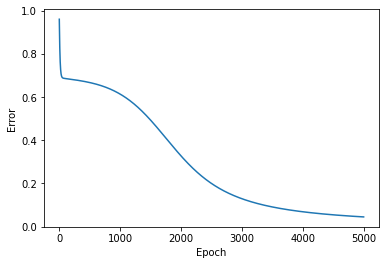

In [7]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')

ax.plot(errors)

## Make a prediction on the data points to test the model (15 points)

In [11]:
# TODO: Predict on the sample input
print("\nOutput of the input After Training:\n")
np.set_printoptions(suppress=True)

input = XOR

predict(weights_1.T, b_1, input)

print(input, dyo)



Output of the input After Training:

[[0 0 1 1]
 [0 1 0 1]] [[ 0.04224706 -0.04085535 -0.04084609  0.05107141]]
